A note book to demostrate how to find the dominant colors in an image


Color R254-G254-B254 is 77 Percent  

ACTUAL color is None and Approx color is white 
Color R54-G58-B70 is 16 Percent  

ACTUAL color is None and Approx color is darkslategray 
Color R185-G202-B223 is 5 Percent  

ACTUAL color is None and Approx color is lightsteelblue 
Color R29-G137-B225 is 1 Percent  

ACTUAL color is None and Approx color is dodgerblue 


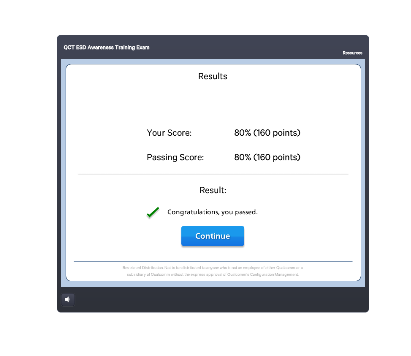

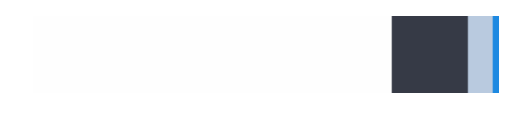

In [80]:
# import the necessary packages
# import the necessary packages
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import webcolors
import cv2

# funtions to approx the RGB triplets
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name


def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
         endX = startX + (percent * 300)
        
         print("Color R%d-G%d-B%d is %d Percent  \n" %(color[0],color[1],color[2],(percent * 100)))
         actual_name, closest_name = get_colour_name((color[0],color[1],color[2]))
         print("ACTUAL color is %s and Approx color is %s "%(actual_name,closest_name) )
         cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
         color.astype("uint8").tolist(), -1)
         startX = endX
    # return the bar chart
    return bar
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True, help = "Path to the image")
#ap.add_argument("-c", "--clusters", required = True, type = int,
#help = "# of clusters")
#args = vars(ap.parse_args())

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread("Pictures/ESD_result.PNG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)
#reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))
# cluster the pixel intensities
clt = KMeans(n_clusters = 4)
clt.fit(image)
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

 Volume in drive C is MININT-00N0PD2
 Volume Serial Number is 360E-8204

 Directory of C:\Users\usasan

09/06/2017  11:00 PM    <DIR>          .
09/06/2017  11:00 PM    <DIR>          ..
09/03/2017  12:01 AM    <DIR>          .android
02/27/2017  02:41 PM    <DIR>          .AndroidStudio2.2
10/07/2016  12:46 PM               390 .bash_history
03/06/2017  03:59 PM    <DIR>          .conda
02/27/2017  06:21 PM    <DIR>          .crashlytics
02/27/2017  03:44 PM                16 .emulator_console_auth_token
08/17/2017  04:35 PM    <DIR>          .gimp-2.8
02/27/2017  06:17 PM    <DIR>          .gradle
09/06/2017  06:24 PM    <DIR>          .ipynb_checkpoints
09/05/2017  04:57 PM    <DIR>          .ipython
09/06/2017  10:43 AM    <DIR>          .jupyter
09/06/2017  07:06 PM    <DIR>          .matplotlib
03/07/2017  07:53 PM    <DIR>          .ssh
08/17/2017  03:06 PM    <DIR>          .thumbnails
03/07/2017  10:17 PM             1,553 .viminfo
02/27/2017  03:30 PM    <DIR>          Androi